<a href="https://colab.research.google.com/github/atulkumarj/Mycode/blob/master/canada_per_capita_income_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
from sklearn  import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [12]:
from google.colab import files
files.upload()


Saving canada_per_capita_income.csv to canada_per_capita_income.csv


{'canada_per_capita_income.csv': b'\xef\xbb\xbfyear,per capita income (US$)\n1970,3399.299037\n1971,3768.297935\n1972,4251.175484\n1973,4804.463248\n1974,5576.514583\n1975,5998.144346\n1976,7062.131392\n1977,7100.12617\n1978,7247.967035\n1979,7602.912681\n1980,8355.96812\n1981,9434.390652\n1982,9619.438377\n1983,10416.53659\n1984,10790.32872\n1985,11018.95585\n1986,11482.89153\n1987,12974.80662\n1988,15080.28345\n1989,16426.72548\n1990,16838.6732\n1991,17266.09769\n1992,16412.08309\n1993,15875.58673\n1994,15755.82027\n1995,16369.31725\n1996,16699.82668\n1997,17310.75775\n1998,16622.67187\n1999,17581.02414\n2000,18987.38241\n2001,18601.39724\n2002,19232.17556\n2003,22739.42628\n2004,25719.14715\n2005,29198.05569\n2006,32738.2629\n2007,36144.48122\n2008,37446.48609\n2009,32755.17682\n2010,38420.52289\n2011,42334.71121\n2012,42665.25597\n2013,42676.46837\n2014,41039.8936\n2015,35175.18898\n2016,34229.19363\n'}

In [13]:
!ls


Canada_home.csv  canada_per_capita_income.csv  sample_data


In [14]:
df= pd.read_csv('canada_per_capita_income.csv')
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [22]:
df=df.rename(columns={'per capita income (US$)' : 'income'})

In [20]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [23]:
df.keys()

Index(['year', 'income'], dtype='object')

In [25]:
df.shape

(47, 2)

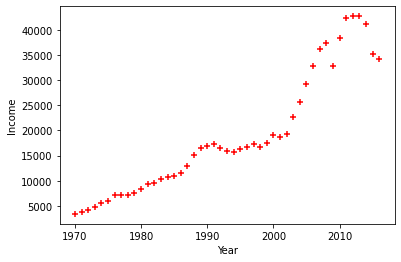

In [33]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Income')
plt.scatter(df.year,df.income, color='Red', marker='+')


In [ ]:
x_year=df.year
y_income=df.income

x_year=np.array(x_year).reshape(-1,1)
x_year.shape

In [41]:
lr=linear_model.LinearRegression()
lr.fit(x_year, y_income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lr.coef_


array([828.46507522])

In [43]:
lr.intercept_

-1632210.7578554575

In [48]:
lr.predict([[2020]])

array([41288.69409442])

# split train and test data

In [59]:
x_year_train, x_year_test, y_income_train, y_income_test  = train_test_split(x_year,y_income,test_size=0.2, random_state=42)
print(x_year_train.shape)
print(x_year_test.shape)
print(y_income_train.shape)
print(y_income_test.shape)

(37, 1)
(10, 1)
(37,)
(10,)


# Fit Train data , Predit  Train data and test R2

In [61]:
lr1=linear_model.LinearRegression()
lr1.fit(x_year_train,y_income_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Preidction and perfromaanc on train data 

In [68]:
coef=lr1.coef_
inter=lr1.intercept_

y_income_train_predit= lr1.predict(x_year_train)


rmse = (np.sqrt(mean_squared_error(y_income_train, y_income_train_predit)))
r2 = round(lr1.score(x_year_train, y_income_train),2)

print('Coefficent is {}'.format(coef))
print('Intercept is {}'.format(inter))
print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Coefficent is [815.14251301]
Intercept is -1605560.1987964255
--------------------------------------
The model performance for training set
--------------------------------------
RMSE is 3949.9001360807097
R2 score is 0.89




# Preidction and perfromaanc on Test data 

In [69]:
coef=lr1.coef_
inter=lr1.intercept_

y_income_test_predit= lr1.predict(x_year_test)


rmse = (np.sqrt(mean_squared_error(y_income_test, y_income_test_predit)))
r2 = round(lr1.score(x_year_test, y_income_test),2)

print('Coefficent is {}'.format(coef))
print('Intercept is {}'.format(inter))
print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Coefficent is [815.14251301]
Intercept is -1605560.1987964255
--------------------------------------
The model performance for training set
--------------------------------------
RMSE is 3892.019469091361
R2 score is 0.88


